Exploring decision tree model.

In decision tree construction, concept of purity is based on the fraction of the data elements in the group that belong to the subset. Purity refers to the homogeneity of the target variable within a node. A node is considered "pure" if all the data instances within it belong to the same class or have the same target value. Conversely, an "impure" node contains a mixture of different classes or target values.

The goal of a decision tree algorithm is to recursively split the data at each node in a way that maximizes the purity of the resulting child nodes. This process aims to create leaf nodes that are as pure as possible, meaning they predominantly contain instances of a single class, allowing for clear and accurate predictions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Entropy as a measure of impurity

This measure quantifies the level of uncertainty or randomness within a dataset regarding its class labels. A pure node has an entropy of 0, while maximum impurity corresponds to an entropy of 1 (for a binary classification problem).

Given **$p_{1}$ as the fraction of examples belonging to a specific class**, the entropy can be represented as in following figure with function $H$. Thus, if $p_{1} = 3/6 = 0.5$, $H(p_{1}) = 1.0$, which means maximum impurity/entropy of 1, unlike when $p_{1} = 6/6$ or $0/6$ which will give entropy/impurity = 0.

Another examples,
* $p_{1} = 5/6$, $H(p_{1}) = 0.65$
* $p_{1} = 6/6$, $H(p_{1}) = 0.00$

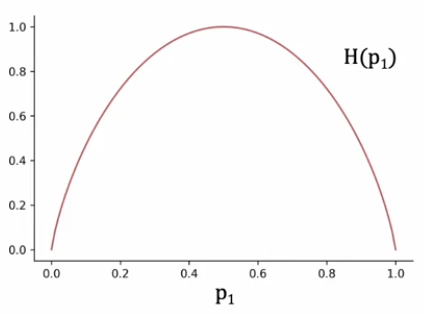

In decision tree learning, the reduction of entropy is called **information gain** and therefore choose what features to use to split on at each node in a decision tree. 

Where 

$$\text{Information Gain} = H(p_1^\text{node})- \left(w^{\text{left}}H\left(p_1^\text{left}\right) + w^{\text{right}}H\left(p_1^\text{right}\right)\right),$$

and $H$ is the entropy, defined as

$$H(p_1) = -p_1 \text{log}_2(p_1) - (1- p_1) \text{log}_2(1- p_1)$$

Remember that log here is defined to be in base 2.

Note that the H attains its higher value when $p = 0.5$. This means that the probability of event is $0.5$. And its minimum value is attained in $p = 0$ and $p = 1$, i.e., the probability of the event happening is totally predictable. Thus, the entropy shows the degree of predictability of an event.

In [2]:
def entropy(p):  
    if p == 0 or p == 1:
        return 0
    else:
        return -p * np.log2(p) - (1- p)*np.log2(1 - p)
        
entropy(0)

0

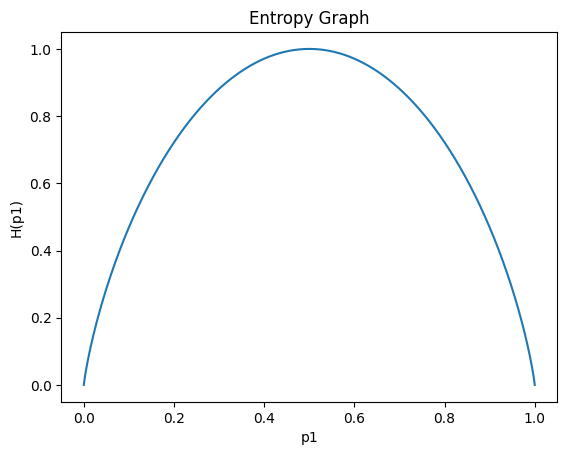

In [3]:
x = np.arange(0, 1+1e-6, 1e-6)
y = [entropy(i) for i in x]

# Create the plot
plt.plot(x, y)

# Add labels and title (optional but recommended)
plt.xlabel("p1")
plt.ylabel("H(p1)")
plt.title("Entropy Graph")

# Display the plot
plt.show()

If a categorical feature can take on $k$ values, creake $k$ binary features (0 or 1 valued). This is called **one-hot encoding**. 

We will use **one-hot encoding** to encode the categorical features. We can define an example as below for a cat classification system:

- Ear Shape: Pointy = 1, Floppy = 0
- Face Shape: Round = 1, Not Round = 0
- Whiskers: Present = 1, Absent = 0

Therefore, we have two sets:

- `X_train`: for each example, contains 3 features:
            - Ear Shape (1 if pointy, 0 otherwise)
            - Face Shape (1 if round, 0 otherwise)
            - Whiskers (1 if present, 0 otherwise)
            
- `y_train`: whether the animal is a cat
            - 1 if the animal is a cat
            - 0 otherwise

In [4]:
X_train = np.array([[1, 1, 1],
[0, 0, 1],
 [0, 1, 0],
 [1, 0, 1],
 [1, 1, 1],
 [1, 1, 0],
 [0, 0, 0],
 [1, 1, 0],
 [0, 1, 0],
 [0, 1, 0]])

y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

X_train[0] # This means that the first example has a pointy ear shape, round face shape and it has whiskers.

array([1, 1, 1])

On each node, we compute the information gain for each feature, then split the node on the feature with the higher information gain, by comparing the entropy of the node with the weighted entropy in the two splitted nodes. 

So, the root node has every animal in our dataset. Note that $p_1^{node}$ is the proportion of positive class (i.e. cats) in the root node. So

$$p_1^{node} = \frac{5}{10} = 0.5$$

Below is a function that split indices for each feature: 

In [6]:
def split_indices(X, index_feature):
    """Given a dataset and a index feature, return two lists for the two split nodes, the left node has the animals that have 
    that feature = 1 and the right node those that have the feature = 0 
    index feature = 0 => ear shape
    index feature = 1 => face shape
    index feature = 2 => whiskers
    """
    left_indices = []
    right_indices = []
    for i,x in enumerate(X):
        if x[index_feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
    return left_indices, right_indices

So, if we choose Ear Shape to split, then we must have in the left node (check the table above) the indices:

$$0 \quad 3 \quad 4 \quad 5 \quad 7$$

and the right indices, the remaining ones.

In [8]:
split_indices(X_train, 0)

([0, 3, 4, 5, 7], [1, 2, 6, 8, 9])

We need another function to compute the weighted entropy in the splitted nodes. We must find:

- $w^{\text{left}}$ and $w^{\text{right}}$, the proportion of animals in **each node**.
- $p^{\text{left}}$ and $p^{\text{right}}$, the proportion of cats in **each split**.

Note the difference between these two definitions!! To illustrate, if we split the root node on the feature of index 0 (Ear Shape), then in the left node, the one that has the animals 0, 3, 4, 5 and 7, we have:

$$w^{\text{left}}= \frac{5}{10} = 0.5 \text{ and } p^{\text{left}} = \frac{4}{5}$$
$$w^{\text{right}}= \frac{5}{10} = 0.5 \text{ and } p^{\text{right}} = \frac{1}{5}$$

In [9]:
def weighted_entropy(X,y,left_indices,right_indices):
    """
    This function takes the splitted dataset, the indices we chose to split and returns the weighted entropy.
    """
    w_left = len(left_indices)/len(X)
    w_right = len(right_indices)/len(X)
    p_left = sum(y[left_indices])/len(left_indices)
    p_right = sum(y[right_indices])/len(right_indices)
    
    weighted_entropy = w_left * entropy(p_left) + w_right * entropy(p_right)
    return weighted_entropy

In [10]:
left_indices, right_indices = split_indices(X_train, 0)
weighted_entropy(X_train, y_train, left_indices, right_indices)

np.float64(0.7219280948873623)

So, the weighted entropy in the 2 split nodes is 0.72. To compute the **Information Gain** we must subtract it from the entropy in the node we chose to split (in this case, the root node). 

In [11]:
def information_gain(X, y, left_indices, right_indices):
    """
    Here, X has the elements in the node and y is theirs respectives classes
    """
    p_node = sum(y)/len(y)
    h_node = entropy(p_node)
    w_entropy = weighted_entropy(X,y,left_indices,right_indices)
    return h_node - w_entropy

In [12]:
information_gain(X_train, y_train, left_indices, right_indices)

np.float64(0.2780719051126377)

Now, let's compute the information gain if we split the root node for each feature:

In [13]:
for i, feature_name in enumerate(['Ear Shape', 'Face Shape', 'Whiskers']):
    left_indices, right_indices = split_indices(X_train, i)
    i_gain = information_gain(X_train, y_train, left_indices, right_indices)
    print(f"Feature: {feature_name}, information gain if we split the root node using this feature: {i_gain:.2f}")
    

Feature: Ear Shape, information gain if we split the root node using this feature: 0.28
Feature: Face Shape, information gain if we split the root node using this feature: 0.03
Feature: Whiskers, information gain if we split the root node using this feature: 0.12


The process is **recursive**, which means we must perform these calculations for each node until we meet a stopping criteria:

- If the tree depth after splitting exceeds a threshold
- If the resulting node has only 1 class
- If the information gain of splitting is below a threshold

As decision trees can be sensitive to small data changes, one way around it is to have a **tree ensemble** with a voting method to make predictions with.